# Import Required libraries

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

# pre-processing

In [3]:
img = Image.open("/content/sample 1.png").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)
img

# fetching results from the deployed model

In [12]:
API_KEY = "" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist()]}]}

response_scoring = requests.post('https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/feba0a2c-8103-41a8-825b-97c0aa6562d2/predictions?version=2022-11-18', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})


# Testing the deployed model result

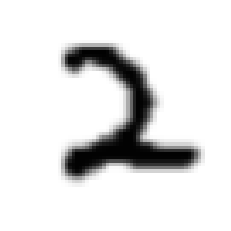

Result:  1


In [13]:
plt.imshow(plt.imread("/content/sample 1.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])